

## Segunda

---

## Índice
---

* [1. Introducción](#intro)
* [2. Contexto](#contexto)
* [3. Preguntas de interés](#preguntas)
* [4. Primera inspección de los datos](#inspeccion)
* [5. Limpieza de los datos](#limpieza)
    * [5.1. Datos nulos](#nulos)
    * [5.2. Datos duplicados](#duplicados)
* [6. Popularidad](#popularidad)
    * [6.1. Géneros](#pop_generos)
    * [6.2. Artistas](#pop_artistas)
    * [6.3. Canciones](#pop_canciones)
* [7. Duración](#duracion)
* [8. Letras explícitas](#explicito)
* [9. Gráficos de cajas de las variables](#cajas)
* [10. Histogramas de frecuencias de las variables](#histogramas)
* [11. Correlaciones entre las variables](#correlaciones)
* [12. Insights y recomendaciones](#insights)

## 1. Introducción <a class="anchor" id="intro"></a>
---

Spotify es una aplicación multiplataforma, nacida en Suecia en 2006, aunque tiene su sede en Londres. Actualmente, es la plataforma de música en streaming más popular del mundo, debido a los acuerdos firmados con algunas de las compañías discográficas internacionales más importantes.
Es importante tener en cuenta que el término streamig se refiere a la distribución de contenido multimedia (radio, televisión y eventos en vivo), a través del uso de Internet.

Es el resultado de unir los dos grandes gustos de su creador, Daniel EK, y darle una perspectiva empresarial. Gracias a su idea de fusionar la música con la tecnología, ahora tenemos una de las plataformas de música digital más grandes y mejores del mundo.
El consumo de contenidos multimedia está creciendo rápidamente a medida que evoluciona la sociedad de la información. Actualmente, plataformas como Spotify han logrado posicionarse como un negocio estable, serio y rentable, gracias a la protección que brindan a la industria musical. Por otro lado, aquellos que encuentran en la música una forma dinámica y entretenida de pasar el tiempo, se han convertido en los mayores fanáticos de esta innovadora herramienta en la actualidad. Esto se debe a sus múltiples beneficios, que conforman sus principales características.

Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les premita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify. Para ello, se realizará un análisis exploratorio para evaluar si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos.
[Introduccion](https://vidabytes.com/en/que-es-spotify/)

## 2. Contexto <a class="anchor" id="contexto"></a>
---
Con el proposito de retener y obtener nuevos clientes, Spotify debde de tener una gran seleccion de generos musicales, tambien debe de contar con una interfaz sencilla y facil de utilizar. Pero a su vez necesita contar con un sistema de recomendaciones de contenido.
Esto para lograr que usuarios puedan conocer mas artistas, canciones y contenido en la plataforma. Esto ayuda a que podamos hacer crecer los usuarios en la plataforma.

Es aqui donde nace la idea de crear un sistema de recomendacion de contenido y clasificacion en base a gustos de los usuarios del servicio. Todo esto para poder dar visibilidad a canciones recien ingresadas al sistema y poder dar presencia a nuevos temas.

Este sistema se basara en las variables y relaciones entre cada tema con mayor gusto, asi como diferentes datos que son mostrados en el dataset a analizar.



## 3. Preguntas de interés <a class="anchor" id="preguntas"></a>
---

Se realizara una serie de preguntas que seran resueltas por medio de EDA

- ¿Es la muestra representativa del total de las canciones del servicio Spotify?
- ¿Los datos están completos, sin duplicados, y bien formateados?
- ¿Hay diferencias estadísticas significativas entre las variables que clasifican las canciones?
- ¿Cuáles son las correlaciones en los diferentes parámetros?

* ¿Cuáles son los géneros más populares?
* ¿Cuáles son los artistas más populares?
* ¿En que variable se destacan las canciones más populares?
* ¿Qué porcentaje de las canciones tienen letras explícitas?
* ¿Cual es la duración promedio de las canciones?


## 4. Primera inspección de los datos <a class="anchor" id="inspeccion"></a>
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from sklearn import preprocessing
from wordcloud import WordCloud
from statistics import median




In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/CoderHouseDataScience/Coder House Data Science/DS/dataset.csv')
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(114000, 21)

El dataset está compuesto por 114.000 registros(Canciones), con  21 variables/columnas.Las cuales ayudan a clasificar las canciones de acuerdo a popularidad, energia de la cancion, bailabilidad , tipo de musica y caracterizticas para clasificacion de canciones o podcast. El dataset puede ser utilizado para constuir un sistema de recomendaciones basado en preferencias de los usuarios, esto basado en el audio y generos.

Algunas de las variables son :

*   Artista
*   Album
*   Nombre de la cancion
*   Popular
*   Duracion en Segundos
*   Explicita
*   Bailable
*   etc


Descripcion de las 21 Columnas/Variables:

*   **track_id:** La ID de Spotify para la pista
*   **artistas:** Los nombres de los artistas que interpretaron la canción. Si hay más de un artista, están separados por un ;
*   **album_name:** El nombre del álbum en el que aparece la pista
*   **track_name:** Nombre de la pista
*  **Popularidad:**La popularidad de una pista es un valor entre 0 y 100, siendo 100 el más popular. La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y qué tan recientes son esas reproducciones. En términos generales, las canciones que se están reproduciendo mucho ahora tendrán una mayor popularidad que las canciones que se tocaron mucho en el pasado. Las pistas duplicadas (por ejemplo, la misma pista de un single y un álbum) se clasifican de forma independiente.
*   **duration_ms:** La longitud de la pista en milisegundos
*   **explícito:** Si la pista tiene o no letras explícitas (verdadero = sí lo hace; falso = no, no lo hace O desconocido)
*   **bailabilidad:** La bailabilidad describe qué tan adecuada es una pista para bailar basada en una combinación de elementos musicales que incluyen tempo, estabilidad rítmica, fuerza de ritmo y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es más bailable
*  **Energía:** La energía es una medida de 0.0 a 1.0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, ruidosas y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach tiene una puntuación baja en la escala.
* **clave:** La clave en la que se encuentra la pista. Los enteros se asignan a los tonos utilizando la notación estándar de clase de tono. Por ejemplo, 0 = C, 1 = C♯/D, 2 = D♭, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1
* **Sonoridad:** La sonoridad total de una pista en decibelios (dB)
* **modo:** El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0
* **Speechiness:** detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente como el discurso sea la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1.0 estará el valor del atributo. Los valores superiores a 0,66 describen pistas que probablemente están hechas completamente de palabras habladas. Los valores entre 0,33 y 0,66 describen pistas que pueden contener música y voz, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0,33 probablemente representan música y otras pistas no similares al habla
* **acústica:** Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica
* **instrumentalidad:** predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" son tratados como instrumentales en este contexto. Las pistas de rap o palabra hablada son claramente "vocales". Cuanto más cerca esté el valor de instrumentalidad de 1.0, mayor será la probabilidad de que la pista no contenga contenido vocal.
* **liveness:** Detecta la presencia de una audiencia en la grabación.Los valores de vida más altos representan una mayor probabilidad de que la pista se haya realizado en vivo. Un valor por encima de 0,8 proporciona una gran probabilidad de que la pista esté activa
* **valencia:** Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimido, enojado)
* **tempo:** El tempo total estimado de una pista en pulsaciones por minuto (BPM). En terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y deriva directamente de la duración promedio del compás.
* **time_signature:** Una firma de tiempo estimada. La firma de tiempo (metro) es una convención notacional para especificar cuántos latidos hay en cada barra (o medida). La firma de tiempo varía de 3 a 7 indicando firmas de tiempo de 3/4, a 7/4.
* **track_genre:** El género al que pertenece la pista


In [ ]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [ ]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

Se observa que el dataset está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningun género quede subrepresentado

## 5. Limpieza de los datos <a class="anchor" id="limpieza"></a>
---

Para que este algoritmo funcione depende de tener informacion limpia y sin datos nulos.

### 5.1. Datos nulos <a class="anchor" id="nulos"></a>

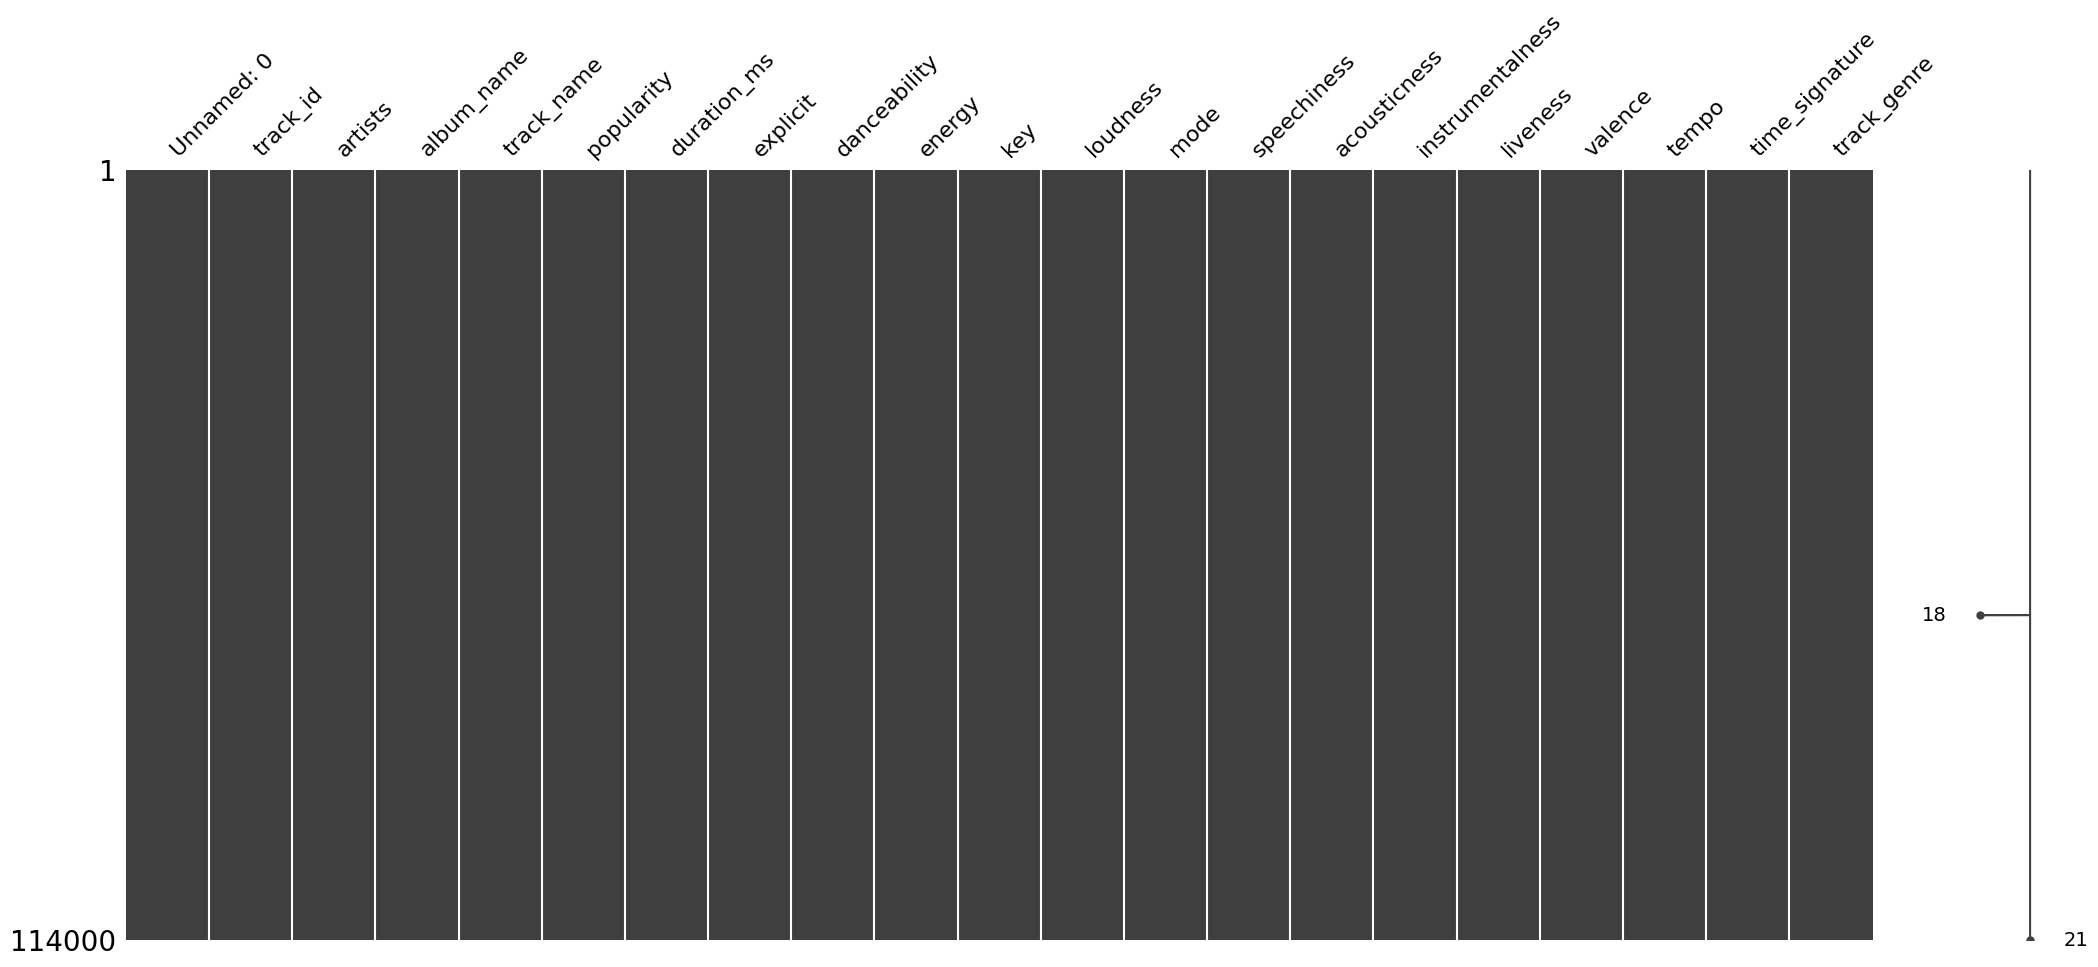

In [ ]:
msno.matrix(df)
plt.show()

Eliminacion de Datos nulos.

Podemos ver por medio del gráfico que el dataframe se encuentra con muy pocos valores nulos, sólo una entrada está incompleta y procedimos a borrarla.

In [ ]:
df = df.dropna()


### 5.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [ ]:

print('Hay {} valores Repetidos en el dataset'.format(df.duplicated(subset = ['track_id']).value_counts()[1]))

Hay 24259 valores Repetidos en el dataset


In [ ]:
df = df.drop_duplicates(subset = ['track_id'])

## 6. Popularidad <a class="anchor" id="popularidad"></a>
---

En esta sección se analizan los géneros, artistas y canciones de mayor popularidad en el dataset.

In [ ]:
df1 = df.copy()
df1.drop(['Unnamed: 0', 'track_id', 'mode', 'key', 'time_signature'], axis = 1, inplace = True)

df1[['artists', 'artist_1']] = df['artists'].str.split(';', n = 1, expand = True)
df1.drop('artist_1', axis = 1, inplace = True)

### 6.1. Géneros <a class="anchor" id="pop_generos"></a>

In [ ]:
#total Generos
print('Hay {} géneros en el dataset'.format(df['track_genre'].unique().size))


Hay 113 géneros en el dataset


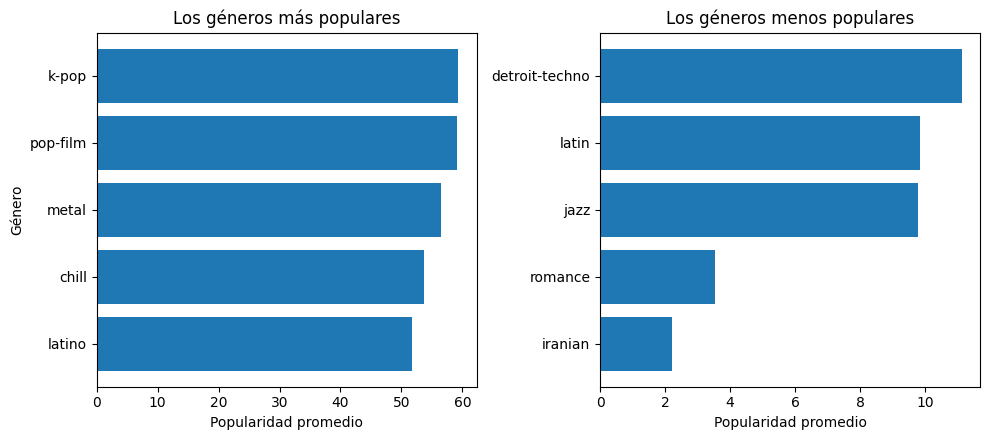

In [ ]:
popularity_mean = df1['popularity'].groupby(df1['track_genre']).mean()
most_popular_genres = popularity_mean.sort_values(ascending = False).head(5)
least_popular_genres = popularity_mean.sort_values(ascending = False).tail(5)

fig, axs = plt.subplots(1, 2, figsize = (10, 4.5))

axs[0].barh(most_popular_genres.index[::-1], most_popular_genres[::-1])
axs[1].barh(least_popular_genres.index[::-1], least_popular_genres[::-1])

axs[0].set_xlabel('Popularidad promedio')
axs[1].set_xlabel('Popularidad promedio')
axs[0].set_ylabel('Popularidad promedio')
axs[0].set_ylabel('Género')
axs[1].set_title('Los géneros menos populares')
axs[0].set_title('Los géneros más populares')
plt.tight_layout()
plt.show()

Se observa que 113 géneros componen el dataset, En los generos mas populares se ecnuentra el kpop,popfilm, metal, chill y latino de los cuales poseen mas de 50 puntos. Tambien podemos ver los genermos menos populares los cuales estan enumerados en la grafica anterior con menos de 11 puntos casi la quinta parte que los mas pupulares.

In [ ]:
df2 = df1[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

### 6.2. Artistas <a class="anchor" id="pop_artistas"></a>
___


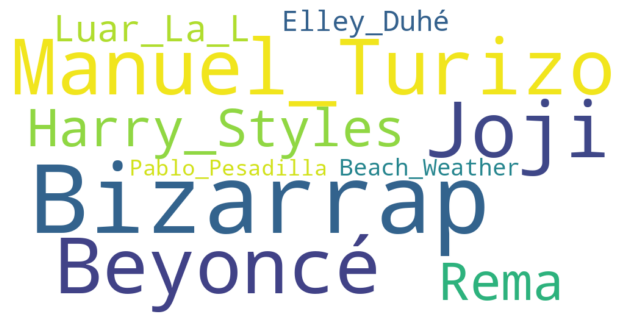

In [ ]:
popular_artists = df1['popularity'].groupby(df1['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(10)

text = list(most_popular_artists.index)
text2 = [text[i].replace(' ', '_') for i in range(len(text))]
text3 = [text2[i].replace('.', '') for i in range(len(text2))]
string = (" ").join(text3)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
# plt.savefig('Popularidad artistas.jpg', dpi = 300)
plt.show()

El Word Cloud muestra el TOP 10 de artistas esto nos puede dar una idea de cuales seran los generos mas populares



```
# Esto tiene formato de código
```

### 6.3. Canciones <a class="anchor" id="pop_canciones"></a>
___

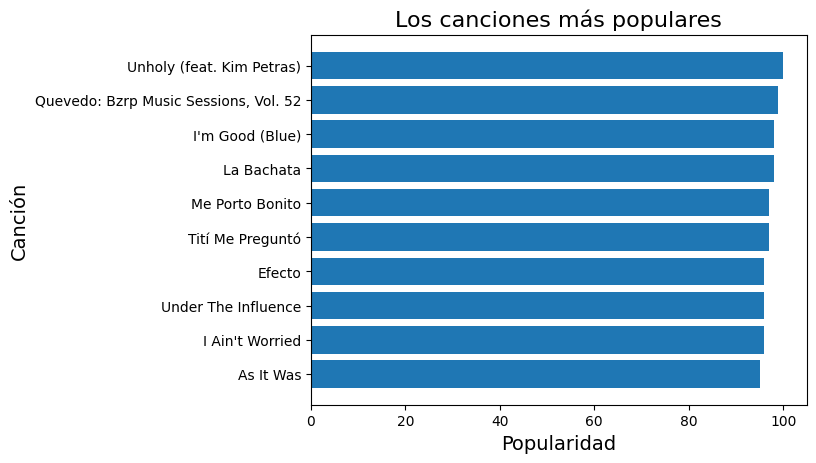

In [ ]:
df2 = df1[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

plt.barh(df2['track_name'][::-1], df2['popularity'][::-1])
plt.xlabel('Popularidad', fontsize = 14)
plt.ylabel('Canción', fontsize = 14)
plt.title('Los canciones más populares', fontsize = 16)
plt.show()

Text(0, 0.5, 'Sequential')

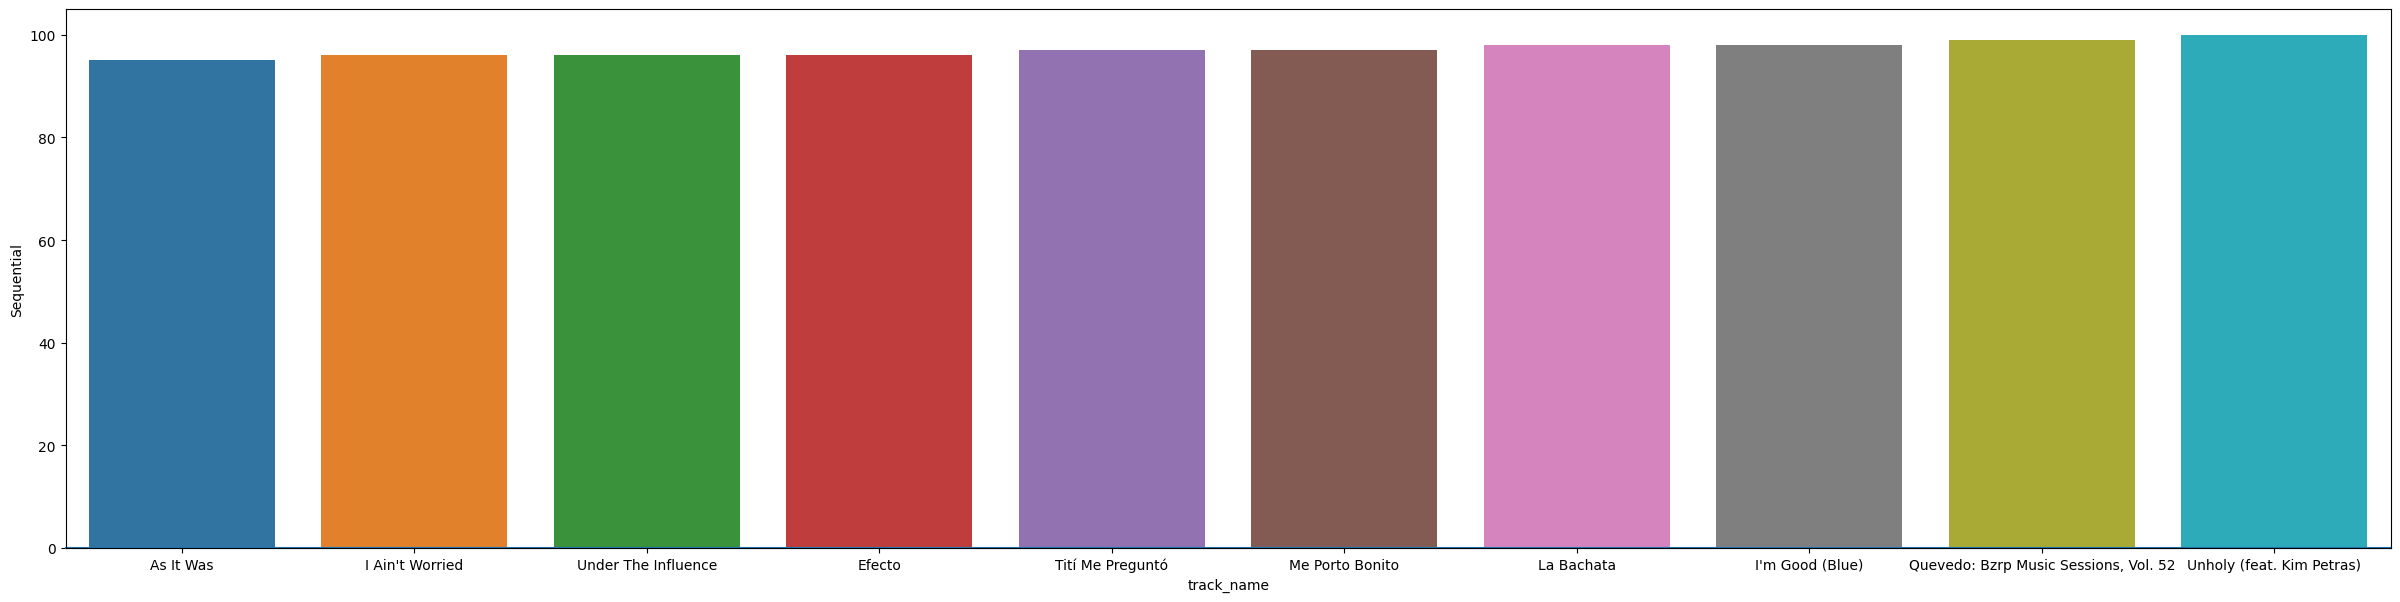

In [ ]:
df2 = df1[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

a4_dims = (30, 7)
fig, ax = plt.subplots(figsize=a4_dims)

x = df2['track_name'][::-1]
y1 = df2['popularity'][::-1]
sns.barplot(x=x, y=y1, ax=ax)
ax.axhline(0, clip_on=False)
ax.set_ylabel("Sequential")


Text(0, 0.5, 'Sequential')

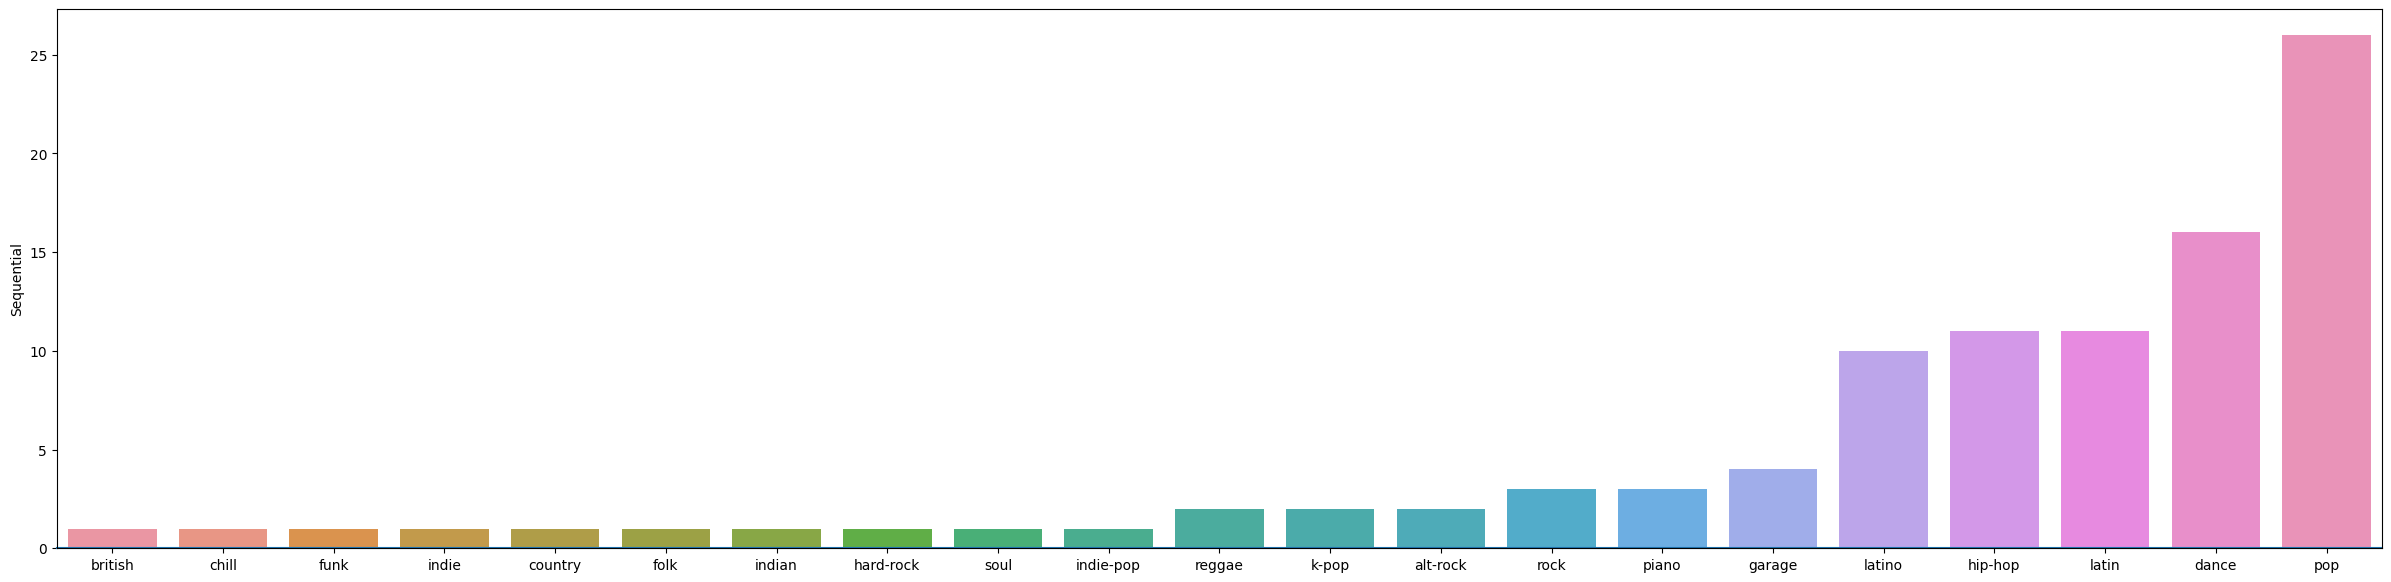

In [ ]:
df3 = df1[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
popular_songs_genre = df3['track_genre'].value_counts()
a4_dims = (30, 7)
fig, ax = plt.subplots(figsize=a4_dims)

x = popular_songs_genre.index[::-1]
y1 = popular_songs_genre[::-1]
sns.barplot(x=x, y=y1, ax=ax)
ax.axhline(0, clip_on=False)
ax.set_ylabel("Sequential")

Por otro lado, si analizamos las canciones más populares y los géneros de dichas canciones, encontramos que en su mayoría que estas canciones pertenecen a los géneros "pop", "dance", "latin" y "latino". Estas canciones.

## 7. Duración <a class="anchor" id="duracion"></a>
---

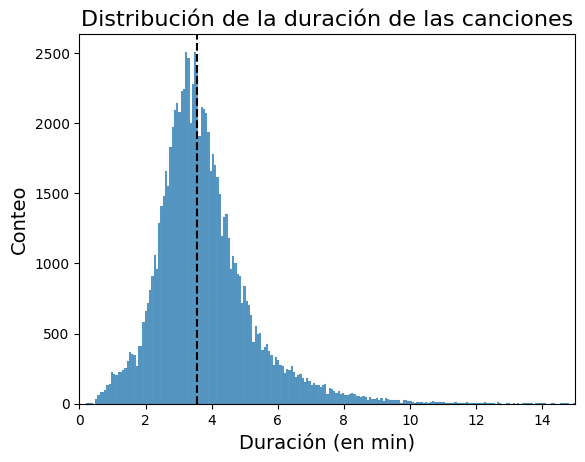

In [ ]:
df1['duration_min'] = (df1['duration_ms']/(60 * 1000)).round(2)
df1.drop('duration_ms', axis = 1, inplace = True)

sns.histplot(df['duration_min'])
plt.axvline(median(df1['duration_min']), c = 'black', ls = '--')
plt.xlim(0, 15)
plt.xlabel('Duración (en min)', fontsize = 14)
plt.ylabel('Conteo', fontsize = 14)
plt.title('Distribución de la duración de las canciones', fontsize = 16)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana casi llegando a los 4 minutos cada cancion  y viendo que otras canciones pueden llegar a tener hasta 14 minutos

## 8. Letras explicítas <a class="anchor" id="explicito"></a>
---

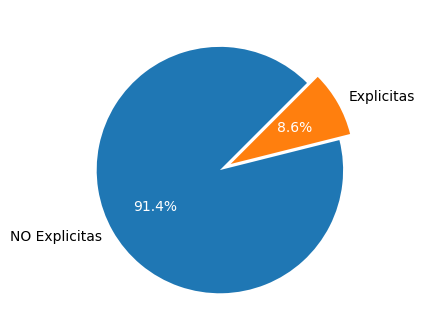

In [ ]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df1.groupby('explicit').size(), labels = ('NO Explicitas', 'Explicitas'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%')
for ins in autotexts:
    ins.set_color('white')
plt.show()

Aqui podemos observar que son mas las canciones sin letra explicita, esta variable nos puede ayudar a saber que las canciones no explicitas son de mayor escucha.
Este dato nos ayuda para poder ayudar con el control parental



# Gráficos de cajas

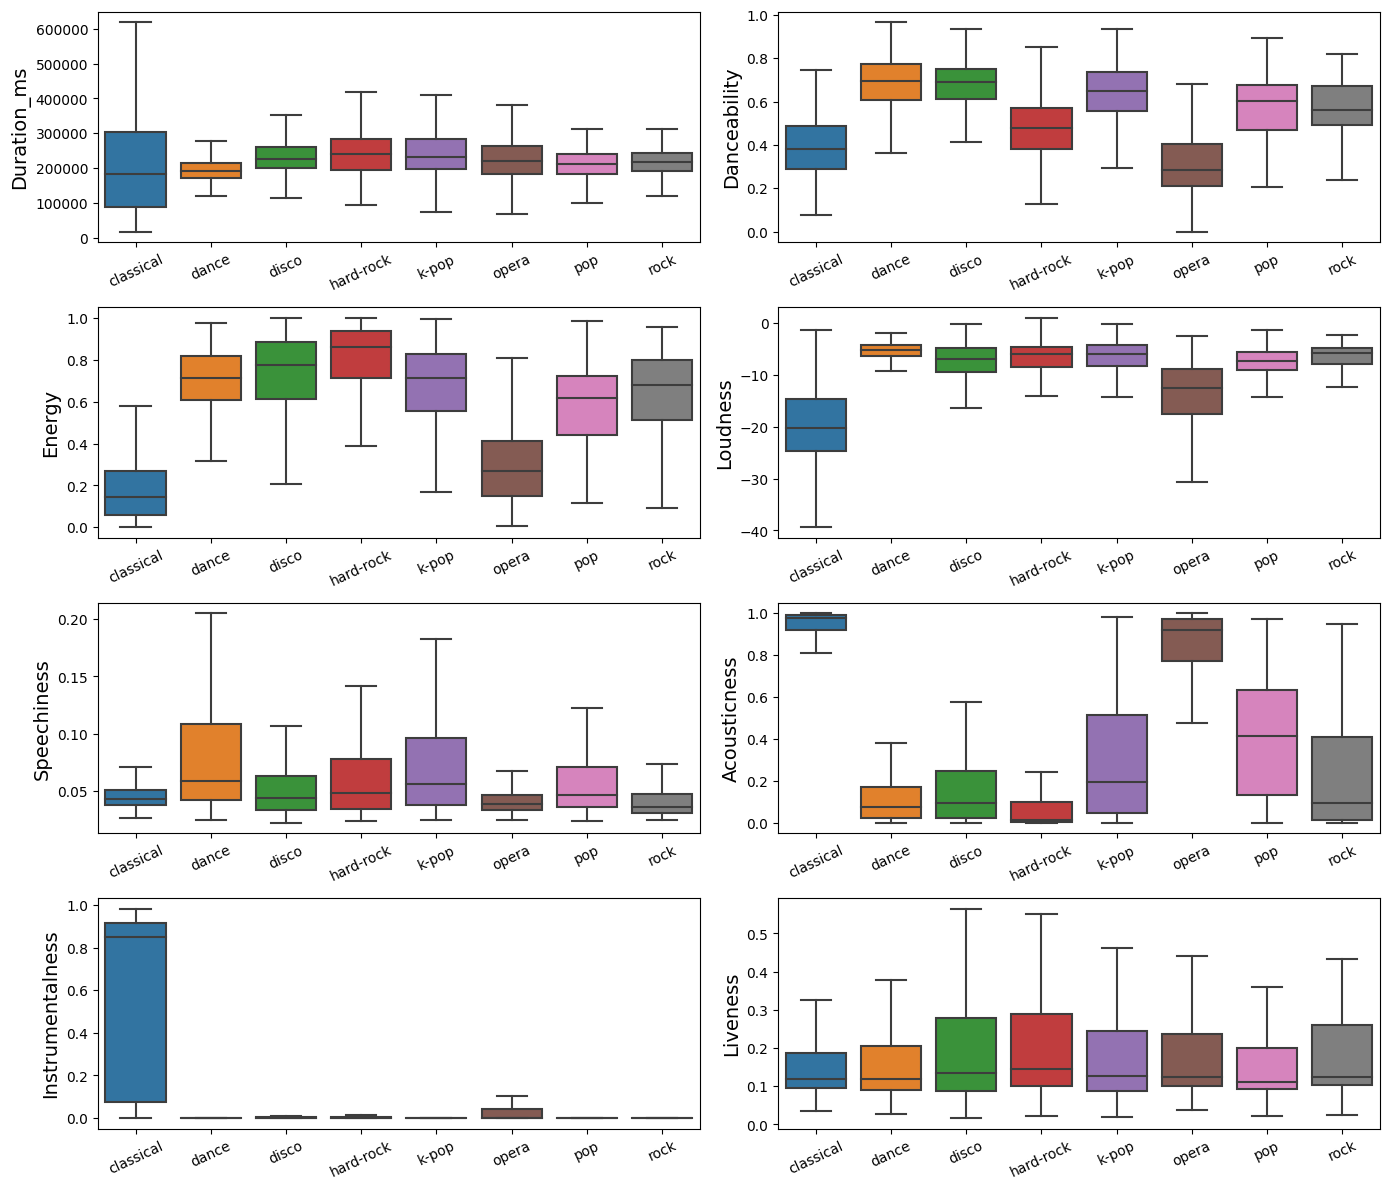

In [ ]:
df_seleccion = df1[df1['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]

columns = df_seleccion.columns[4:-3]

l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 12))

for x, column in zip(range(12), df_seleccion[l]):

    plt.subplot(int(len(l)/2), 2, x + 1)
    sns.boxplot(data = df_seleccion, y = column, x = df_seleccion['track_genre'], showfliers = False)

    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)

plt.tight_layout()

En estos gráficos de cajas se puede observar que los distintos géneros presentan diferenciasentre las variables.

## 10. Histogramas de frecuencias de las variables <a class="anchor" id="histogramas"></a>
---

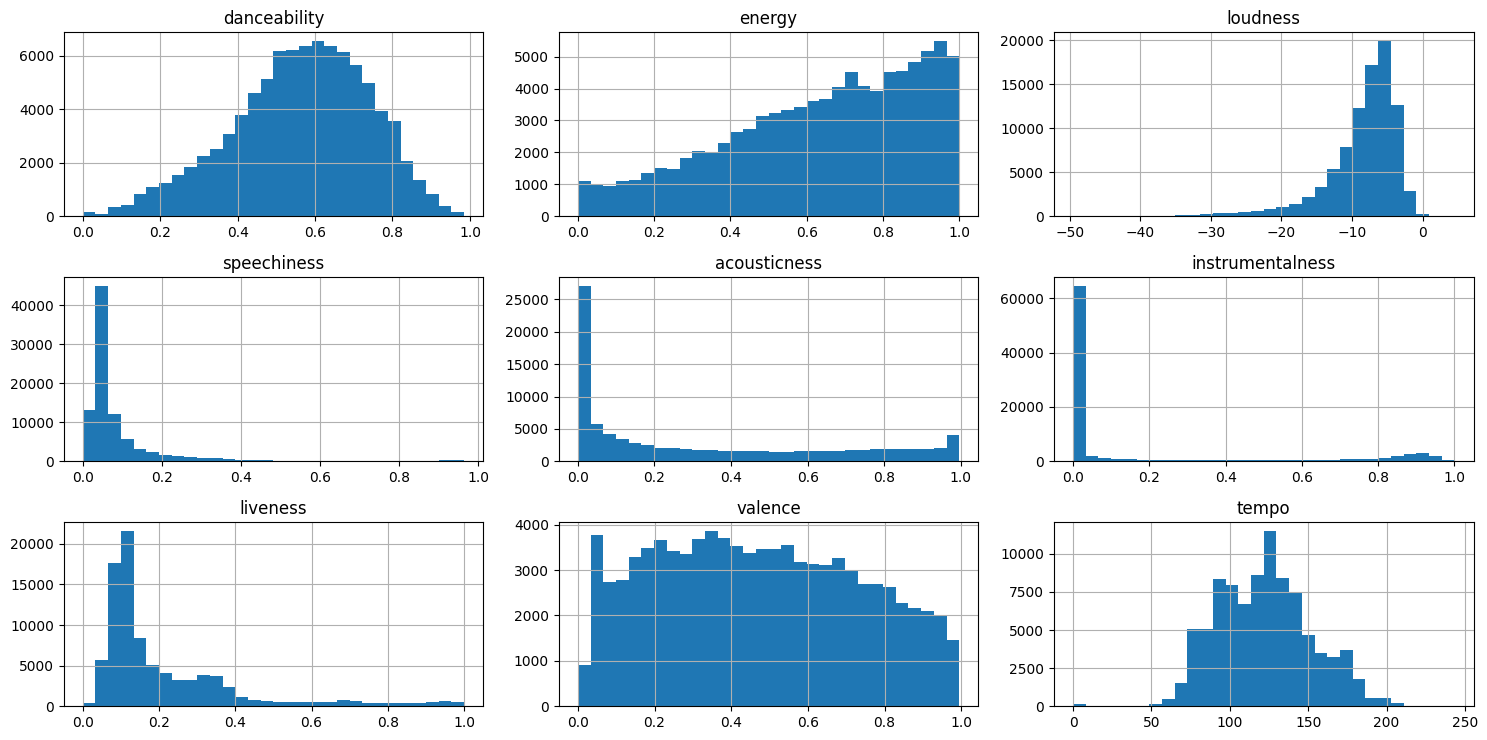

In [ ]:
df1.iloc[:, 5:-1].hist(bins = 30, figsize = (15, 7.5))
plt.tight_layout()
plt.show()

Los histogramas de las variables numéricas  muestran una distribucion, es por esto que deberá tenerse especial cuidado a la hora de plantear la estandarización de estos datos. Variables como "tempo" y "danceablility" ya tienen un comportamiento similar al normal o distribuciones similares a log-normal ("loudness", "liveness")  habrá que estudiarlos y evaluarlos

## 11. Correlaciones entre las variables <a class="anchor" id="correlaciones"></a>
---

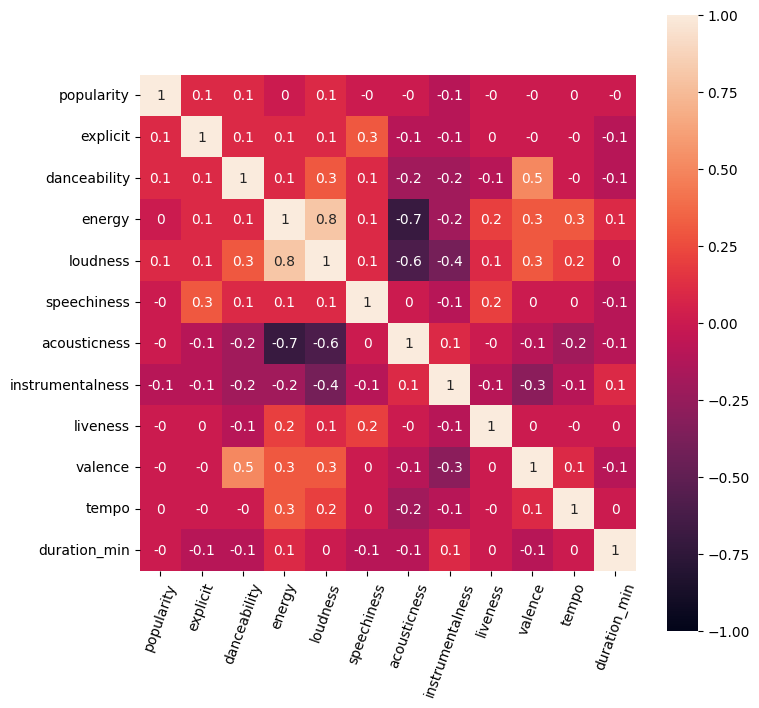

In [ ]:
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(df1.corr(numeric_only = True).round(1), vmin=-1, vmax=1,  cbar = True, annot = True)
plt.xticks(rotation = 70)
plt.show()

El  mapa de calor de los datos. Este gráfico muestra  correlaciones de distinto grado. Algunas pares presentan fuerte correlación (por ejemplo: energy y loudness, energy y acousticness) con lo que se podría pensar en disminuir el número de variables a la hora de entrenar el algoritmo de recomendación.

Los géneros, artistas y canciones más populares, pop, hip-hop y latino. Las canciones y los géneros más elegidas por los usuarios son aquellas que transmiten energía y voluntad de bailar. En consecuencia, los artistas más populares son aquellos que incluyen estos géneros en su repertorio.

 Esto da sustento a la posibilidad para crear un sistema de recomendación de canciones en función de las preferencias de los usuarios a partir de algormitmos de clasificación y de clustering.

## 12. Insights y recomendaciones <a class="anchor" id="ins&recom"></a>
---

En función del analisis exploratorio del dataset se presentan los siguientes insights:

- El dataset consiste en 113 géneros musicales, y cada uno de ellos está compuesto por mil canciones, esto ofrece una buena representatividad que será beneficiosa para los algoritmos de aprendizaje automático.

- Los datos estan completos y bien formateados, sin embargo existe un buen número de entradas repetidas. El trabajo de data wrangling requerido no será muy extensivo.

- Las canciones más populares pertenecen, en su gran mayoría, a los géneros pop, hip-hop y latino. En consecuencia, los artistas más populares son los que se dedican a los mencionados géneros.

- Las canciones más elegidas por los usuarios son aquellas que transmiten mayor energía, emociones típicamente calificadas como positivas y voluntad de bailar.

- Se compararon cada una de las variables en función del género musical, encontrando diferencias que pueden ser sutiles o drásticas, según los géneros considerados. Esto permitiría agrupar a los géneros similares en grandes grupos.

- Los histogramas de las variables del dataset muestran un gran abanico de distribuciones. Además, diversos pares de variables presentan elevados coeficientes de correlación.

Y a su vez, en respuesta a los insight, se plantean las recomendaciones que continúan:

- Analizar diferentes criterios de normalizacion de los datos.

- Para el sistema de clasificación: evaluar algortimos de clasificación tales como KNeighbors, Gaussian Naive Bayes, Decision Tree, etc.

- Para el sistema de recomendación: evaluar algoritmos de clustering, como por ejemplo: KMeans, DBSCAN, AGNES, etc.